# Importamos nuestras librerías

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

## Translación de imagen

$$ \left| \begin{matrix}{}
1 & 0 & t_x  \\
0  & 1 & t_y \\
\end{matrix} \right| * \left| \begin{matrix}{}
x  \\
y  \\
1 \\
\end{matrix} \right| =  \left| \begin{matrix}{}
\hat{x}  \\
\hat{y} \\
\end{matrix} \right|$$



Text(0.5,1,'Translated image')

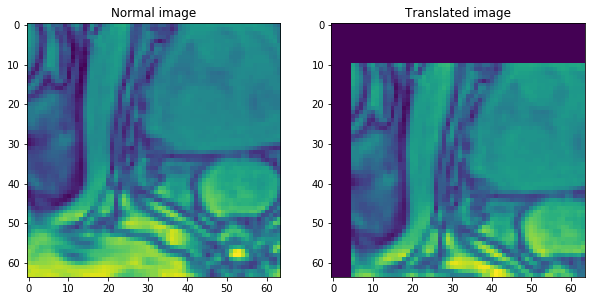

In [42]:
path = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateX-Screenshots-Train\\ProstateX-Screenshots-Train"
imgs_names = os.listdir(path)
currently_path = path + "\\{}".format(
    imgs_names[np.random.randint(0,len(imgs_names))])
M = np.float32([[1,0,5],[0,1,10]])
img = cv.imread(currently_path,0)
rows,cols = img.shape
img_translated = cv.warpAffine(img,M,(rows,cols))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title("Normal image")
plt.subplot(122)
plt.imshow(img_translated)
plt.title("Translated image")


## Rotación de la imagen

$$ \left| \begin{matrix}{}
 \cos(\theta_x) & \sin(\theta_x) & 0 \\
-\sin(\theta_x)  & \cos(\theta_x) & 0 \\
\end{matrix} \right| * \left| \begin{matrix}{}
x  \\
y  \\
1 \\
\end{matrix} \right| =  \left| \begin{matrix}{}
\hat{x}  \\
\hat{y} \\
\end{matrix} \right|$$

Text(0.5,1,'Rotated image')

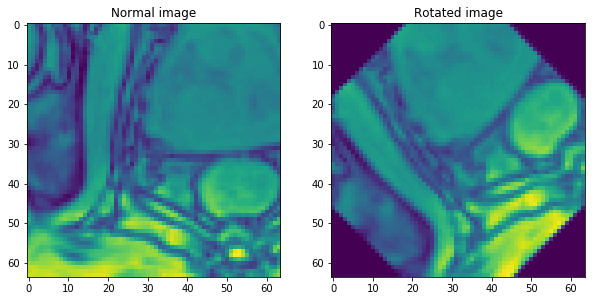

In [43]:
R = cv.getRotationMatrix2D((rows/2,cols/2), 45, 1)
img_rotated = cv.warpAffine(img,R,(rows,cols))
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title("Normal image")
plt.subplot(122)
plt.imshow(img_rotated)
plt.title("Rotated image")

# Image registration usando coeficiente de correlación mejorado (ECC)

Text(0.5,1,'Image recovered')

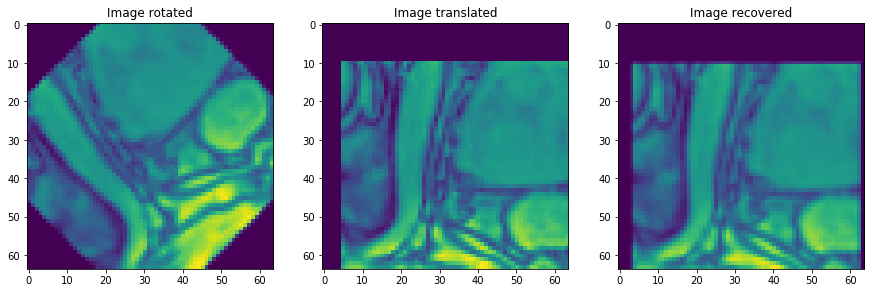

In [44]:
path = "C:\\Users\\Camilo\\Documents\\Prostatex\\1\\Train\\ProstateX-Screenshots-Train\\ProstateX-Screenshots-Train"
imgs_names = os.listdir(path)
currently_path1 = path + "\\{}".format(
    imgs_names[np.random.randint(0,len(imgs_names))])
currently_path2 = path + "\\{}".format(
    imgs_names[np.random.randint(0,len(imgs_names))])

#read the images

#Matrix M of transformation
warp_matrix = np.eye(2, 3, dtype=np.float32)
warp_mode = cv.MOTION_TRANSLATION
number_of_iterations = 100;
termination_eps = 1e-2;
criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)
# Run the ECC algorithm. The results are stored in warp_matrix.
(cc, warp_matrix) = cv.findTransformECC (img_rotated,img_translated, warp_matrix, warp_mode, criteria)
im2_aligned = cv.warpAffine(img_translated, warp_matrix, 
                              (img_rotated.shape[1],img_rotated.shape[0]));
 # Show final results
plt.figure(figsize=(15,15))
plt.subplot(131)
plt.imshow(img_rotated)
plt.title("Image rotated")
plt.subplot(132)
plt.imshow(img_translated)
plt.title("Image translated")
plt.subplot(133)
plt.imshow(im2_aligned)
plt.title("Image recovered")